# Исследование объявлений о продаже квартир

На основе данных о квартирах нужно провести анализ рынка недвижимости Санкт-Петербурга.

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv(
    '/datasets/real_estate_data.csv',
    sep='\t')

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [3]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [4]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


### Вывод

Есть проблемы с типами данных (цена, дата и время, вещественные числа в данных о количестве этажей и т.д.), есть пустые значения, которые нужно заменить на нули (например, в данных о том, является ли объект апартаментами), а есть такие, которые лучше оставить пустыми (например, как в данных о расстоянии до аэропорта). Так же есть нереалистичные значения внутри данных: вряд ли существуют квартиры с высотой потолков в 100 метров.  
  
Скорее всего, в ходе изучения всплывут и другие проблемы в данных.

### Шаг 2. Предобработка данных

Для начала обработаем пропуски. К разным столбцам необходим разный подход.

Пропуски в данных о высоте потолков, количестве этажей в доме, площади квартиры и кухни, близости аэропортов, парков и центра города, а также о длительности размещения объявления проигнорируем, чтобы не искажать данные.

Пропуски в данных о наличии балконов заполним нулями: если пользователь не заполнил данные о них, скорее всего, в квартире их нет.

In [5]:
data['balcony'] = data['balcony'].fillna(0)

Проверим заполнение.

In [6]:
data['balcony'].isna().sum()

0

Данные о том, является ли квартира апартаментами, нужно обработать дважды: заполнить пропуски и изменить тип данных на булев.  
  
Для начала посмотрим, какие вообще значение есть в этом столбце.

In [7]:
data['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

Всего два значения: `True` и `False`, но записаны не как булевы значения, а как объекты. Это нужно исправить.  
Для начала заполним все пустые значения словами `False`, потому что, как и в случае с балконами, если пользователь пропустил эти данные, значит, квартира апартаментами не является.

In [8]:
data['is_apartment'] = data['is_apartment'].fillna('False')
data['is_apartment'].isna().sum()

0

Теперь поменяем тип данных на булев и сразу проверим.

In [9]:
data['is_apartment'] = data['is_apartment'] == 'True'
data['is_apartment'].dtypes

dtype('bool')

Те пропуски, которые нужно было заполнить, заполнены, пришло время изменить типы данных в нескольких столбцах. Пойдём по порядку.
***

Квартиры как правило стоят несколько миллионов, и вряд ли кто-то выставляет свою за 3 миллиона рублей 15 копеек, так что данные о цене можно смело приводить к целочисленному виду.

In [10]:
data['last_price'] = data['last_price'].astype(int)

Данные о дате переведём в тип `datetime`.

In [11]:
data['first_day_exposition'] = pd.to_datetime(
    data['first_day_exposition'], 
    format='%Y-%m-%dT%H:%M:%S')

Количество этажей нельзя сделать целочисленным: в столбце есть пропуски, которые мы решили не заполнять. Столбец с пропусками в количественных данных всегда имеет тип `float`.

А вот данные о количестве балконов мы заполнили, поэтому теперь можно поменять тип на целочисленный.

In [12]:
data['balcony'] = data['balcony'].astype(int)

Остальные данные, аналогично с количеством этажей, не получится привести к целочисленному виду, так как в них есть пропуски.

Проверим данные ещё раз, чтобы убедиться, что типы изменены, а пропуски заполнены (там, где это было необходимо).

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null int64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 23699 non-null int64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around

In [14]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,...,11.0,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,...,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000,159.0,2015-07-24,3,NaN,14.0,NaN,9,False,...,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Число пропусков в данных о близости разных объектов (аэропорта, центра города, парков и т.д.) подозрительно совпадает. Посмотрим на таблицу с пропусками и попытаемся найти объяснение.

In [15]:
data_strange = data.query('parks_around3000.isna() == True')
data_strange.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5518 entries, 5 to 23698
Data columns (total 22 columns):
total_images            5518 non-null int64
last_price              5518 non-null int64
total_area              5518 non-null float64
first_day_exposition    5518 non-null datetime64[ns]
rooms                   5518 non-null int64
ceiling_height          2943 non-null float64
floors_total            5508 non-null float64
living_area             4895 non-null float64
floor                   5518 non-null int64
is_apartment            5518 non-null bool
studio                  5518 non-null bool
open_plan               5518 non-null bool
kitchen_area            4803 non-null float64
balcony                 5518 non-null int64
locality_name           5510 non-null object
airports_nearest        0 non-null float64
cityCenters_nearest     0 non-null float64
parks_around3000        0 non-null float64
parks_nearest           0 non-null float64
ponds_around3000        0 non-null float64


Пропуски действительно совпали в столбцах с информацией о расстоянии до разных объектов.

In [16]:
data_strange.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5,10,2890000,30.40,2018-09-10,1,NaN,12.0,14.40,5,False,...,9.10,0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
8,20,2900000,33.16,2018-05-23,1,NaN,27.0,15.43,26,False,...,8.81,0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
12,10,3890000,54.00,2016-06-30,2,NaN,5.0,30.00,5,False,...,9.00,0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.0
22,20,5000000,58.00,2017-04-24,2,2.75,25.0,30.00,15,False,...,11.00,2,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,60.0
30,12,2200000,32.80,2018-02-19,1,NaN,9.0,NaN,2,False,...,NaN,0,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0


Кажется, из столбца с населенным пунктом пропал Санкт-Петербург. Проверим.

In [17]:
data_strange.query('locality_name == "Санкт-Петербург"')['locality_name'].count()

61

Посмотрим, сколько раз встречается Питер в оригинальной таблице.

In [18]:
data.query('locality_name == "Санкт-Петербург"')['locality_name'].count()

15721

Санкт-Петербург не пропал полностью, но осталась всего 61 строка с ним из почти 16 тысяч. Скорее всего пользователи не ввели полный адрес, и система не смогла расчитать расстояния до объектов.  
  
Квартир из Санкт-Петербурга в таблице немного больше, чем ненулевых значений в данных о расстояниях до объектов. Есть ещё города районного значения, с которыми система справилась. Если же квартира находится не в городе (например, в посёлке), система (предположительно) присваивает нулевое значение данным о расстоянии до объекта (водоёме, парке и т.д.).
***

Проверим данные на дубликаты.

In [19]:
data.duplicated().sum()

0

Проверим, есть ли проблемы с регистром в данных о населенном пункте.

In [20]:
data['locality_name'].value_counts()

Санкт-Петербург              15721
посёлок Мурино                 522
посёлок Шушары                 440
Всеволожск                     398
Пушкин                         369
                             ...  
деревня Борисова Грива           1
деревня Пустынка                 1
деревня Терпилицы                1
коттеджный посёлок Лесное        1
посёлок Коробицыно               1
Name: locality_name, Length: 364, dtype: int64

На всякий случай поменяем все ё на е, чтобы избежать неправильно посчитанных населенных пунктов.

In [21]:
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')

In [22]:
data['locality_name'].value_counts()

Санкт-Петербург                 15721
поселок Мурино                    556
поселок Шушары                    440
Всеволожск                        398
Пушкин                            369
                                ...  
поселок Цвылево                     1
городской поселок Свирьстрой        1
деревня Трубников Бор               1
деревня Большая Пустомержа          1
поселок Калитино                    1
Name: locality_name, Length: 330, dtype: int64

### Вывод

В данных было несколько ошибок, последствия которых нам удалось устранить. Например, даты были записаны в неверном формате, а также данные об апартаментах имели объектный тип вместо булевого. Почти наверняка это ошибка записи данных, о которой нужно сообщить разработчикам.  
  
Некоторые значения явно пропущены из-за того, что пользователи не стали их указывать. Например, количество балконов, если балконов нет, высоту потолков, потому что не знают её или не считают этот параметр важным и т.д.  
  
В то же время от нескольких десятков до более чем тысячи квартир не имеют важных данных о себе: жилой площади и площади кухни, названия населенного пункта, где они расположены, этажности дома.  
  
В данных о расстояниях до объектов пропуски получились из-за того, что некоторые квартиры находятся не в городах, и система не смогла рассчитать данные. Кроме того, 61 человек из Санкт-Петербурга (такие могут быть и в других городах), скорее всего, заполнил адрес квартиры недостаточно точно, и расстояния также не были рассчитаны для таких квартир.  
  
Дубликатов в данных не было, проблем с регистром, судя по всему, тоже.

### Шаг 3. Посчитайте и добавьте в таблицу

Посчитаем и добавим в таблицу цену квадратного метра для каждой квартиры. Для этого разделим цену квартиры на общую площадь.

In [23]:
data['price_per_meter'] = data['last_price'] / data['total_area']

Теперь расчитаем, в какой день недели, месяц и год были сделаны объявления.

In [24]:
data['weekday_number'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year

Чтобы создать столбец с информацией об этаже, создадим функцию, которая будет принимать этаж квартиры и этажность дома, а возвращать информацию о том, находится ли квартира на первом, последнем или другом этаже.

In [25]:
def floor_func(data):
    floor = data['floor']
    floors_total = data['floors_total']
    try:
        if floor == 1:
            return 'Первый'
        if floor == floors_total:
            return 'Последний'
        if floor != 1 and floor != floors_total:
            return 'Другой'
    except:
        return 'Неизвестно'

Применим функцию построчно.

In [26]:
data['floor_info'] = data.apply(floor_func, axis=1)

Теперь посчитаем отношение жилой площади к общей и также выделим в отдельный столбец.

In [27]:
data['living_to_total'] = data['living_area'] / data['total_area']

То же самое — для площади кухни.

In [28]:
data['kitchen_to_total'] = data['kitchen_area'] / data['total_area']

Взглянем на общую информацию, чтобы убедиться, что все манипуляции прошли успешно.

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 29 columns):
total_images            23699 non-null int64
last_price              23699 non-null int64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 23699 non-null int64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around

In [30]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,weekday_number,month,year,floor_info,living_to_total,kitchen_to_total
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,2.0,755.0,NaN,120370.370370,3,3,2019,Другой,0.472222,0.231481
1,7,3350000,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,...,0.0,NaN,81.0,82920.792079,1,12,2018,Первый,0.460396,0.272277
2,10,5196000,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,...,2.0,574.0,558.0,92785.714286,3,8,2015,Другой,0.612500,0.148214
3,0,64900000,159.0,2015-07-24,3,NaN,14.0,NaN,9,False,...,3.0,234.0,424.0,408176.100629,4,7,2015,Другой,NaN,NaN
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,1.0,48.0,121.0,100000.000000,1,6,2018,Другой,0.320000,0.410000


In [31]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,weekday_number,month,year,living_to_total,kitchen_to_total
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,23699.000000,...,8079.000000,18181.000000,9110.000000,20518.000000,2.369900e+04,23699.000000,23699.000000,23699.000000,21796.000000,21421.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,0.591080,...,490.804555,0.770255,517.980900,180.888634,9.942166e+04,2.569307,6.400101,2017.367146,0.564766,0.187355
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,0.959298,...,342.317995,0.938346,277.720643,219.727988,5.030680e+04,1.789082,3.491561,1.039771,0.105368,0.072968
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,...,1.000000,0.000000,13.000000,1.000000,1.118349e+02,0.000000,1.000000,2014.000000,0.021583,0.025381
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,...,288.000000,0.000000,294.000000,45.000000,7.658547e+04,1.000000,3.000000,2017.000000,0.495177,0.133333
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,...,455.000000,1.000000,502.000000,95.000000,9.500000e+04,3.000000,6.000000,2017.000000,0.567860,0.172414
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,1.000000,...,612.000000,1.000000,729.000000,232.000000,1.142563e+05,4.000000,10.000000,2018.000000,0.637880,0.232416
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,...,3190.000000,3.000000,1344.000000,1580.000000,1.907500e+06,6.000000,12.000000,2019.000000,1.000000,0.787879


### Вывод

Мы создали несколько столбцов с общей информацией, которая пригодится для дальнейшего анализа.

### Шаг 4. Проведите исследовательский анализ данных

Построим гистограммы для площади, цены, числа комнат и высоты потолков.

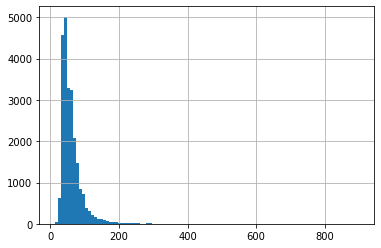

In [32]:
data['total_area'].hist(bins=100);

Некоторые квартиры — аномально большие, они смещают собой распределение. Попробуем убрать квартиры с площадью больше 200 кв. м. и посмотрим на результат.

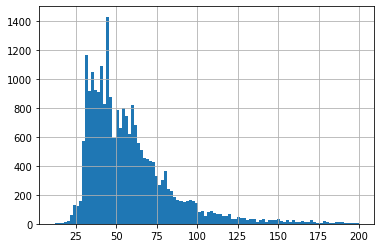

In [33]:
data.query('total_area <= 200')['total_area'].hist(bins=100);

Уже лучше. Посчитаем, сколько квартир мы отбросили (и какую долю).

In [34]:
print(data.query('total_area > 200')['total_area'].count())
print(data.query('total_area > 200')['total_area'].count() / data.shape[0])

227
0.009578463226296468


Меньше 1%. этим можно смело пренебречь, ведь отбросив один процент датасета, мы существенно улучшили данные, убрав слишком длинный хвост. Создадим новую таблицу, в которой не будет слишком больших квартир.

In [35]:
data_normal = data.query('total_area <= 200 or total_area.isna() == True')

Уже для новой таблицы построим гистограмму стоимости квартир (заодно построим и для старой, чтобы понимать, повлияло ли изменение и на цену).

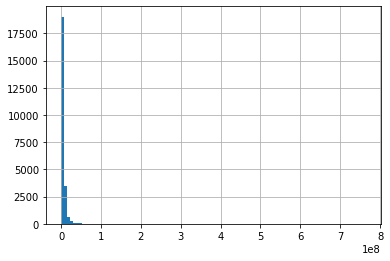

In [36]:
data['last_price'].hist(bins=100);

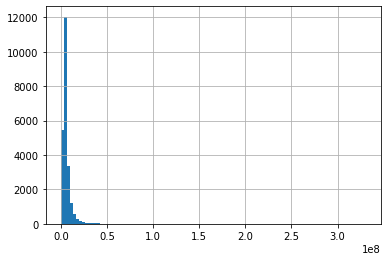

In [37]:
data_normal['last_price'].hist(bins=100);

Можно видеть, что данные уже изменились в лучшую сторону (хоть и несильно). По-прежнему есть несколько слишком дорогих квартир, которые портят выборку. Воспользуемся диаграммой размаха, чтобы вычислить цену, по которой стоит ограничить выборку.

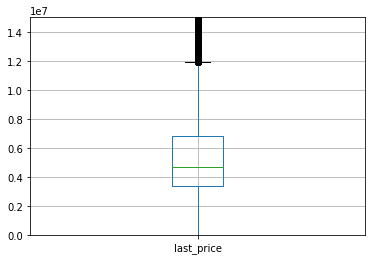

In [38]:
plt.ylim(0, 15000000)
data.boxplot('last_price');

12 миллионов рублей. Попробуем построить гистограмму для квартир не дороже 12 миллионов и посмотрим на результат.

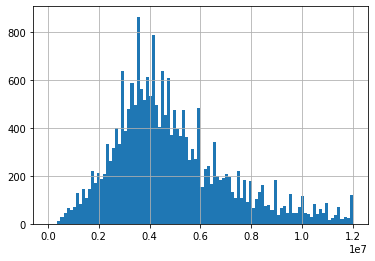

In [39]:
data_normal.query('last_price <= 12000000')['last_price'].hist(bins=100);

Получился график, более-менее похожий на нормальное распределение. Посмотрим, от скольких квартир пришлось избавиться.

In [40]:
print(data_normal.query('last_price > 12000000')['last_price'].count())
print(data_normal.query('last_price > 12000000')['last_price'].count() / data_normal.shape[0])

1717
0.07315098841172461


Чуть больше 7%. Многовато, но с другой стороны мы получили намного более «честные» данные, чем были до этого. Стоит того. Сохраним новую таблицу в уже имеющейся переменной.

In [41]:
data_normal = data_normal.query('last_price <= 12000000 or last_price.isna() == True')

Теперь посмотрим гистограмму по количеству комнат.

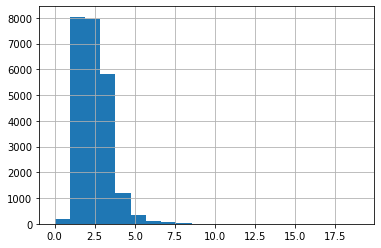

In [42]:
data['rooms'].hist(bins=20);

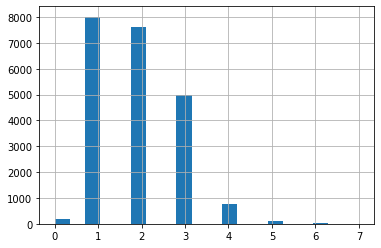

In [43]:
data_normal['rooms'].hist(bins=20);

Положительный эффект от прошлый преобразований: пропали квартиры с 15 комнатами. Тем временем, кажется, обнаружились квартиры с 0 комнат.

In [44]:
data_normal.query('rooms < 1')['rooms'].count()

195

Таких квартир целых 195. Возможно, это студии или квартиры открытого типа. Проверим.

In [45]:
data_normal.query('rooms < 1 and (studio == True or open_plan == True)')['rooms'].count()

195

Так и есть. Оставим нули, чтобы выделять такие квартиры в общей массе.

Осталось только проверить потолки.

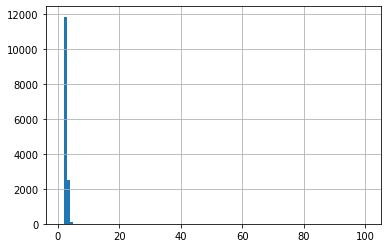

In [46]:
data['ceiling_height'].hist(bins=100);

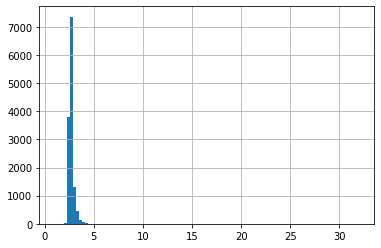

In [47]:
data_normal['ceiling_height'].hist(bins=100);

Тут нереалистичные данные на месте. Потолков по 100 метров больше нет, но всё ещё есть по 30. Уберём все квартиры выше 4 метров.

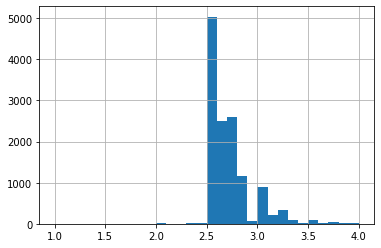

In [48]:
data_normal.query('ceiling_height <= 4')['ceiling_height'].hist(bins=30);

Стало лучше. Посмотрим, сколько квартир пришлось убрать.

In [49]:
data_normal.query('ceiling_height > 4')['ceiling_height'].count()

51

Всего 51. Однозначно стоило того. Проверим также, есть ли квартиры ниже 2 метров.

3


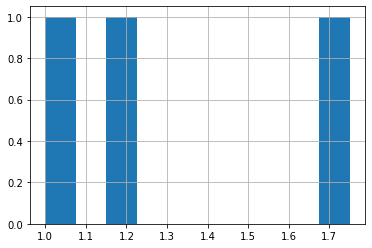

In [50]:
print(data_normal.query('ceiling_height < 2')['ceiling_height'].count())
data_normal.query('ceiling_height < 2')['ceiling_height'].hist(bins=10);

В существование квартиры высотой 1,7 метра ещё можно поверить, но 2 другие высотой чуть больше метра лучше убрать.

In [51]:
data_normal = data_normal.query('1.5 < ceiling_height <= 4 or ceiling_height.isna() == True')

Проверим, какие данные у нас остались и насколько они лучше тех, что были.

In [52]:
data_normal.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,weekday_number,month,year,living_to_total,kitchen_to_total
count,21702.000000,2.170200e+04,21702.000000,21702.000000,13121.000000,21626.000000,20009.000000,21702.00000,19625.000000,21702.000000,...,6781.000000,16228.000000,7828.000000,19053.000000,21702.000000,21702.000000,21702.000000,21702.000000,20009.000000,19625.000000
mean,9.683992,4.876238e+06,53.480569,1.935812,2.687083,10.764311,30.689607,5.88849,9.647104,0.589208,...,489.087893,0.713212,530.856413,173.543431,92091.038245,2.575062,6.398627,2017.383329,0.564484,0.189186
std,5.544367,2.270176e+06,19.312846,0.915930,0.224659,6.638461,13.659721,4.90818,3.872191,0.939455,...,330.522081,0.894141,277.316232,212.038725,29692.521017,1.793794,3.488654,1.021543,0.104221,0.071191
min,0.000000,1.219000e+04,12.000000,0.000000,1.750000,1.000000,2.000000,1.00000,1.300000,0.000000,...,1.000000,0.000000,16.000000,1.000000,111.834862,0.000000,1.000000,2014.000000,0.038462,0.043524
25%,6.000000,3.300000e+06,39.000000,1.000000,2.500000,5.000000,18.100000,2.00000,7.000000,0.000000,...,289.000000,0.000000,315.000000,44.000000,74603.174603,1.000000,3.000000,2017.000000,0.494681,0.135729
50%,9.000000,4.400000e+06,49.500000,2.000000,2.600000,9.000000,29.200000,4.00000,9.000000,0.000000,...,455.000000,0.000000,519.000000,92.000000,92619.047619,3.000000,6.000000,2017.000000,0.567742,0.175000
75%,14.000000,6.000000e+06,64.000000,3.000000,2.750000,16.000000,39.500000,8.00000,11.000000,1.000000,...,613.000000,1.000000,741.000000,219.000000,109408.083255,4.000000,10.000000,2018.000000,0.636695,0.234114
max,50.000000,1.200000e+07,190.000000,7.000000,4.000000,60.000000,127.000000,33.00000,64.000000,5.000000,...,3190.000000,3.000000,1344.000000,1580.000000,387096.774194,6.000000,12.000000,2019.000000,1.000000,0.787879


### Вывод

Мы потеряли всего чуть меньше 2 тысяч строк, но данные стали намного реалистичнее. В будущих подсчётах это пригодится.
***

Теперь изучим время продажи квартир.

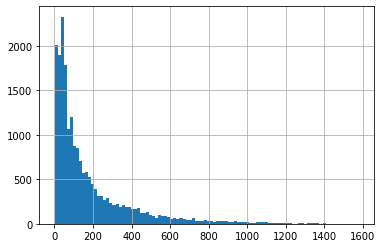

In [53]:
data['days_exposition'].hist(bins=100);

Чтобы понять, какое время продажи считать слишком долгим, а какое — слишком быстрым, взглянем на диаграмму размаха.

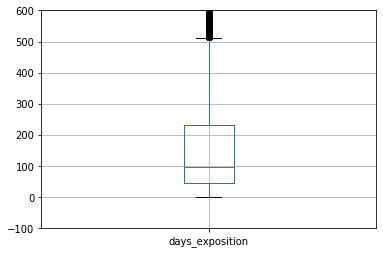

In [54]:
plt.ylim(-100, 600)
data.boxplot('days_exposition');

Продажи дольше 500 дней можно смело считать слишком долгими. Тем временем слишком быстрых продаж фактически нет, нижний «ус» графика упирается в ноль.

In [55]:
data.query('days_exposition > 500')['days_exposition'].count()

1749

1749 квартир продавали слишком долго. Для более правдоподобных данных придётся от них избавиться.

In [56]:
data_not_too_long = data.query('days_exposition <= 500')

Посмотрим на гистограмму новой выборки.

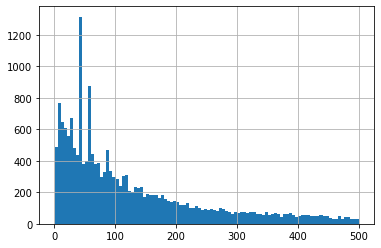

In [57]:
data_not_too_long['days_exposition'].hist(bins=100);

График в целом похож на распределение Пуассона. Это хорошо — такое распределение подходит для времени продажи квартиры.

In [58]:
data_not_too_long.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,weekday_number,month,year,living_to_total,kitchen_to_total
count,18769.00000,1.876900e+04,18769.000000,18769.000000,10909.000000,18699.000000,17158.000000,18769.000000,16816.000000,18769.000000,...,6252.000000,14475.000000,7112.000000,18769.000000,1.876900e+04,18769.000000,18769.000000,18769.000000,17158.000000,16816.000000
mean,9.67798,6.062996e+06,57.758056,1.995951,2.755299,10.926467,32.865391,6.020726,10.300828,0.598007,...,490.038708,0.744387,525.706693,127.145080,9.738630e+04,2.592306,6.598061,2017.357984,0.562401,0.189827
std,5.66506,1.065312e+07,32.793531,1.031414,1.303197,6.673793,20.492303,4.959958,5.470920,0.952628,...,341.094097,0.920730,276.457923,119.259737,4.663807e+04,1.788657,3.482478,0.845280,0.105429,0.072106
min,0.00000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,2.000000,0.000000,...,1.000000,0.000000,13.000000,1.000000,1.118349e+02,0.000000,1.000000,2015.000000,0.021583,0.025381
25%,6.00000,3.390000e+06,39.000000,1.000000,2.500000,5.000000,18.125000,2.000000,7.000000,0.000000,...,287.000000,0.000000,305.000000,41.000000,7.647059e+04,1.000000,3.000000,2017.000000,0.491376,0.136121
50%,9.00000,4.500000e+06,50.000000,2.000000,2.650000,9.000000,29.600000,4.000000,9.000000,0.000000,...,453.000000,0.000000,513.000000,84.000000,9.390244e+04,3.000000,7.000000,2017.000000,0.565090,0.175719
75%,14.00000,6.365000e+06,66.400000,3.000000,2.800000,16.000000,40.800000,8.000000,11.700000,1.000000,...,613.000000,1.000000,736.000000,181.000000,1.117333e+05,4.000000,10.000000,2018.000000,0.635409,0.234706
max,50.00000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,...,3190.000000,3.000000,1344.000000,500.000000,1.907500e+06,6.000000,12.000000,2019.000000,1.000000,0.787879


Среднее уменьшилось со 180 до 127, неплохой результат.

На гистограмме видны два выброса. Посмотрим, на каких значениях они произошли.

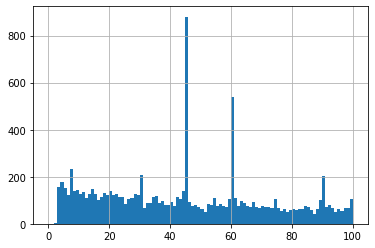

In [59]:
data_not_too_long['days_exposition'].hist(bins=100, range=(0, 100));

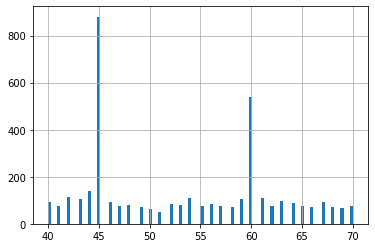

In [60]:
data_not_too_long['days_exposition'].hist(bins=100, range=(40, 70));

Всплески продаж на круглых значениях: 45 и 60 дней (1,5 и 2 месяца). Также, судя по гистограмме в промежутке от 0 до 100, есть небольшие всплески на 7, 30 и 90 днях.

### Вывод

1. Продажи квартир дольше 500 дней — слишком долгие.
2. Есть странные пики на «круглых» значениях: неделя, 1, 1,5, 2 и 3 месяца. Возможно, на объявлениях был таймер автоудаления после определённого периода. Или система настроена автоматически вычищать объявления с нулевым числом новых просмотров за определённый период.

### Зависимость цены от параметров квартиры

Теперь посмотрим на зависимость цены от разных параметров: площади, количества комнат и удалённости от центра.

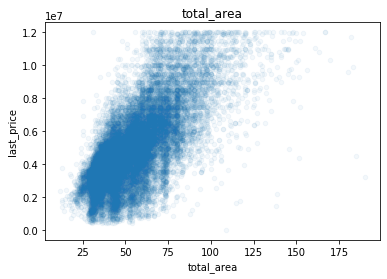

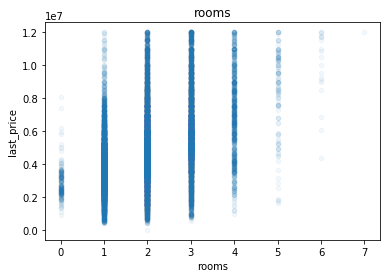

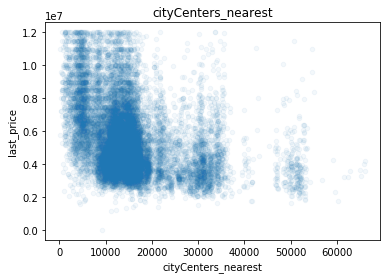

In [61]:
data_valuable = data_normal[['last_price', 'total_area', 'rooms', 'cityCenters_nearest']]
for series in data_valuable:
    if series != 'last_price':
        data_valuable.plot(x=series,
                           y='last_price',
                           kind='scatter',
                           title=series,
                           alpha=0.05);

На графиках зависимости цены от площади и от расстояния от центра видна связь: чем больше площадь, тем квартира дороже, и чем дальше от центра, тем дешевле (при этом есть скорее две зоны: близко к центру и дорого и дальше от центра и дешевле). Для изучения зависимости цены от количества комнат лучше построить линейных график.

Для этого сначала составим сводную таблицу, где индексом будет количество комнат, а значениями — медианная цена квартир с таким числом комнат.

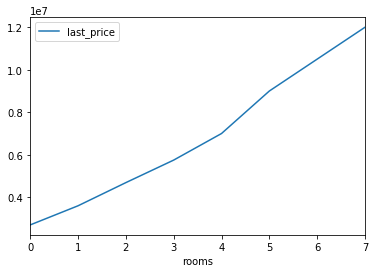

In [62]:
rooms_price = data_normal.pivot_table(
    index='rooms',
    values='last_price',
    aggfunc='median')
rooms_price.plot(y='last_price');

Теперь совершенно очевидна связь: чем больше комнат, тем дороже квартира.  
На всякий случай взглянем на значения коэффициента корреляции цены со значениями выше.

In [63]:
data_valuable = data_normal[['total_area', 'last_price', 'rooms', 'cityCenters_nearest']]
for series in data_valuable:
    if series != 'last_price':
        print(
            series + ':',
            data_valuable['last_price']
            .corr(data_valuable[series]))

total_area: 0.7054177560744401
rooms: 0.4576528059426907
cityCenters_nearest: -0.3483448551727377


Больше всего, ожидаемо, цена зависит от площади. Чуть меньше — от количества комнат. Удалённость от центра тем временем влияет на цену меньше всего.
***

Посмотрим также на зависимость цены от этажа: первого, последнего и другого.

            last_price
floor_info            
Другой         4600000
Первый         3820000
Последний      4050000


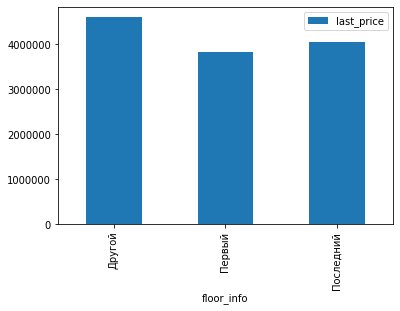

In [64]:
floor_price = data_normal.pivot_table(
    index='floor_info',
    values='last_price',
    aggfunc='median')
print(floor_price)
floor_price.plot(
    y='last_price',
    kind='bar');

Разница ощутимая: квартиры на первом этаже почти на миллион дешевле, чем те, которые располагаются не на первом и не на последнем этаже. Квартиры на последнем этаже тоже дешевле, чем «другие», но всё ещё существенно дороже, чем на первом. Это может быть связано, например, с тем, что на последнем этаже есть риск протечки крыши, из-за которого такое жильё покупают менее охотно.
***

Теперь посмотрим на зависимость цены от дня недели, месяца и года размещения объявления. Автоматизируем процесс при помощи цикла.

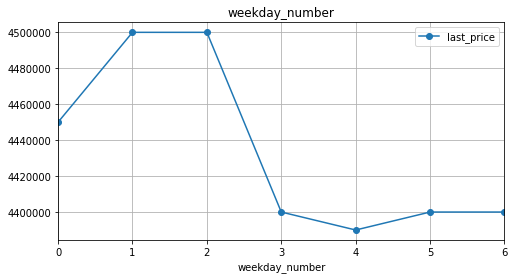

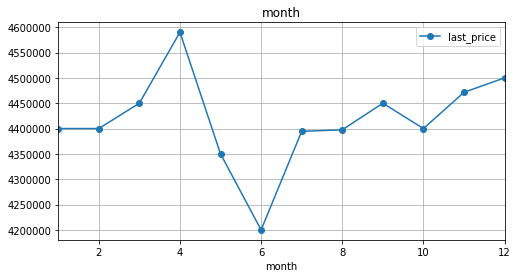

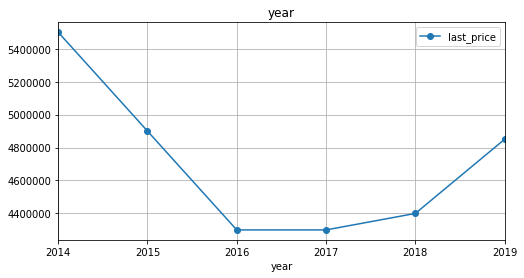

In [65]:
periods = data_normal[['last_price', 'weekday_number', 'month', 'year']]
for period in periods:
    if period != 'last_price':
        period_table = periods.pivot_table(
            index=period,
            values='last_price',
            aggfunc='median'
        )
        period_table.plot(
            y='last_price',
            title=period,
            figsize=(8, 4),
            grid=True,
            style='o-'
        )

На графике зависимости от года всё довольно очевидно: в 2014 году случился кризис из-за международного конфликта, цены на нефть упали, как и котировки рубля. Падение затронуло в том числе и рынок недвижимости. После 2017-го начался постепенный рост.  
  
В начале недели цены несколько выше, чем в конце. Возможно, это просто случайность (разница среды и четверга — всего 100 тысяч рублей, что немного для цен на недвижимость).
  
С месяцами сложнее: есть заметный пик на апреле и впадина на июне. Просадка цен летом понятна: люди разъезжаются по дачам и отпускам (особенно на майские праздники и в начале лета) и меньше интересуются недвижимостью. Затем интерес постепенно возвращается к началу учебного года. Также есть небольшой рост перед Новым годом.

### Вывод

Выводы очень логичные:
- чем дальше от центра, тем квартиры дешевле,
- чем больше площадь и число комнат, тем дороже,
- первый этаж относительно дешевле остальных, последний — дороже первого но дешевле других,
- в кризис квартиры дешевеют.

### Топ-10 населённых пунктов

Теперь посмотрим на 10 населенных пунктов с самым большим числом объявлений и посчитаем среднюю цену жилья в них. Выведем топ-10 городов, отсортированных по средней цене за квадратный метр.

In [66]:
locations = (
    data_normal
    .pivot_table(
        index='locality_name', 
        values='price_per_meter', 
        aggfunc=['count', 'mean']
    )
    .sort_values(
        by='count', 
        ascending=False
    )
    .head(10)
)
locations.sort_values(
    by='mean', 
    ascending=False
)

,count,mean
locality_name,,
Санкт-Петербург,13816,105613.055457
Пушкин,338,100241.085742
деревня Кудрово,298,92409.726322
поселок Парголово,326,90332.263023
поселок Мурино,554,85656.214377
поселок Шушары,440,78677.364217
Колпино,336,75185.478229
Гатчина,304,68432.443926
Всеволожск,396,67161.591197


Самый дорогой населенный пункт, ожидаемо, Санкт-Петербург. За ним с небольшим отставанием идёт Пушкин (город, где находится Царское село, одна из главных достопримечательностей Петербурга). Самые «дешёвые» города из первой десятки — Гатчина, Всеволожск и Выборг.
***

### Санкт-Петербург и его центр

Теперь внимательнее рассмотрим квартиры из Санкт-Петербурга. Посмотрим, как удаленность квартиры от центра влияет на цену.

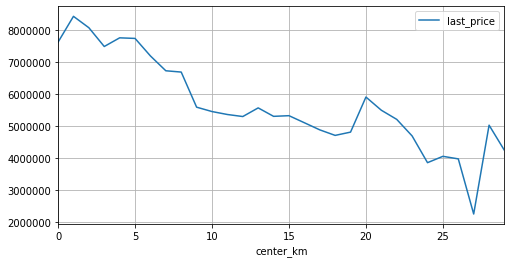

In [67]:
data_normal['center_km'] = (data_normal['cityCenters_nearest'] / 1000).round()
(
    data_normal
    .query('locality_name == "Санкт-Петербург"')
    .pivot_table(
        index='center_km',
        values='last_price'
    )
    .plot(
        y='last_price',
        grid=True,
        figsize=(8, 4)
    )
);

Если смотреть справа-налево, видно, что в промежутке с 19 до 9 километров до центра цена растёт не сильно. После 8 километров чем ближе к центру, тем сущетвенно дороже квартиры. Дома в радиусе 8 км от центра и будем считать центром города.

In [68]:
# создаем два датафрейма: с квартирами только в Санкт-Петербурге и с квартирами в радиусе 8 км от центра
data_spb = data_normal.query('locality_name == "Санкт-Петербург"')
data_spb_center = data_spb.query('center_km <= 8')

В центре:


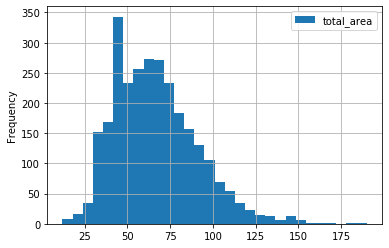

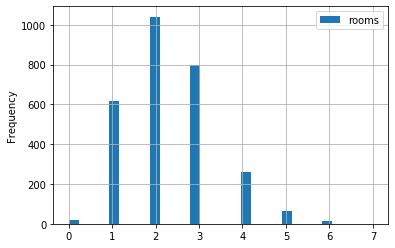

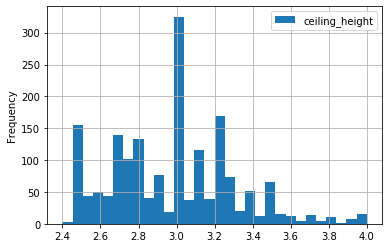

In [69]:
center_pars = data_spb_center[['total_area', 'rooms', 'ceiling_height']]
print('В центре:')
for par in center_pars: # par — parameter
    center_pars.plot(
        y=par,
        kind='hist',
        bins=30,
        grid=True
    )

Сравним данные с Санкт-Петербургом в целом.

Во всём городе:


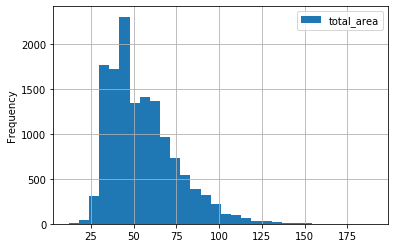

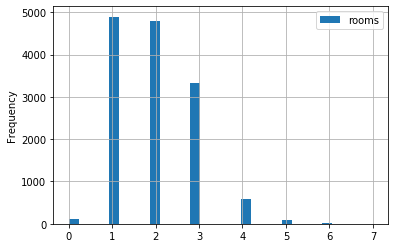

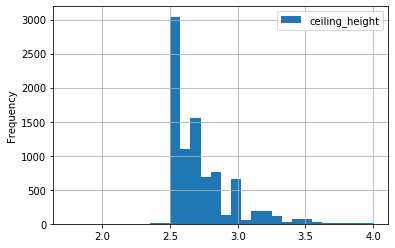

In [70]:
entire_spb_pars = data_spb[['total_area', 'rooms', 'ceiling_height']]
print('Во всём городе:')
for par in entire_spb_pars: # par — parameter
    entire_spb_pars.plot(
        y=par,
        kind='hist',
        bins=30,
        grid=True
    )

В центре города:
- преобладают 2-комнатные квартиры (в городе в целом — 1-комнатные);
- чуть больше средняя площадь квартир (график смещён немного вправо относительно квартир всего города);
- квартиры с более высокими потолками (пик приходится на 3 метра против 2,5 метров в городе в целом).
***

Теперь посмотрим на зависимость цены от количества комнат, этажа, удалённости от центра и времени размещения объявления.

Для начала автоматизируем вывод линейных графиков для комнат и разных периодов размещения (дней недели, месяцев, лет).

В центре:


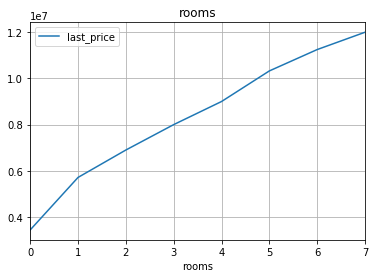

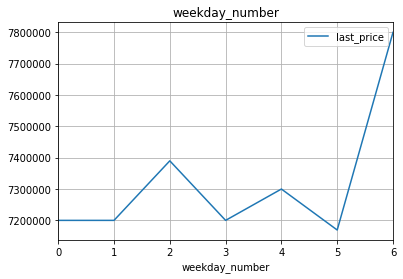

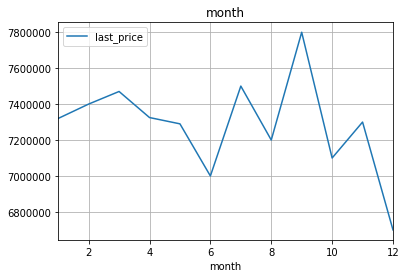

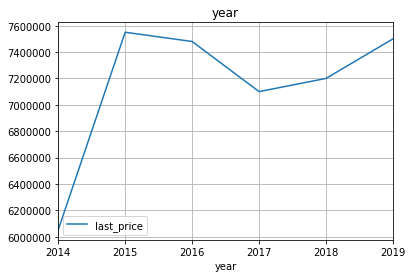

In [71]:
center_pars_2 = data_spb_center[['last_price', 'rooms', 'weekday_number', 'month', 'year']]
print('В центре:')
for par in center_pars_2: # par — parameter
    if par != 'last_price':
        (
            center_pars_2
            .pivot_table(
                index=par,
                values='last_price',
                aggfunc='median'
            )
            .plot(
                y='last_price',
                title=par,
                grid=True
            )
        );

То же самое сделаем и для всего Петербурга, чтобы сравнить.

Во всём городе:


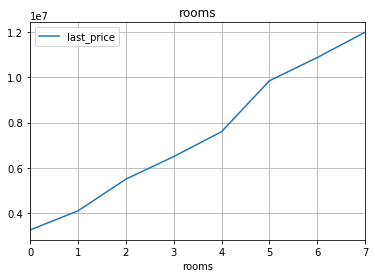

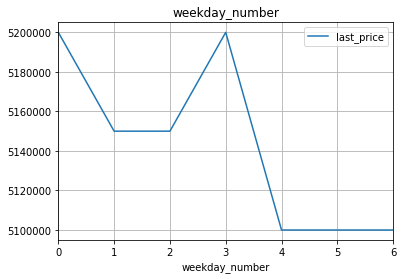

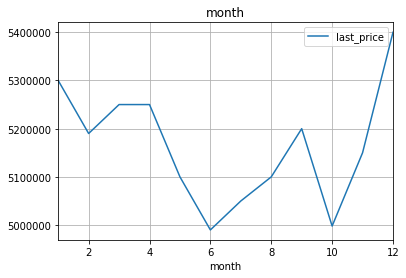

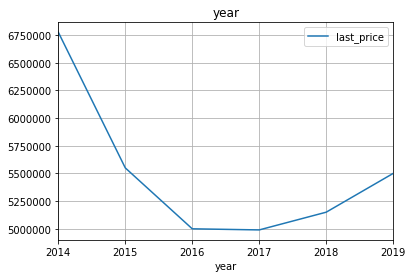

In [72]:
entire_spb_pars_2 = data_spb[['last_price', 'rooms', 'weekday_number', 'month', 'year']]
print('Во всём городе:')
for par in entire_spb_pars_2: # par — parameter
    if par != 'last_price':
        (
            entire_spb_pars_2
            .pivot_table(
                index=par,
                values='last_price',
                aggfunc='median'
            )
            .plot(
                y='last_price',
                title=par,
                grid=True
            )
        );

Зависимость цены от количества комнат везде похожая, а вот с датами всё иначе:
- во-первых, квартиры в центре в период кризиса не только не подешевели, но наоборот сильно подорожали и затем почти не теряли в цене,
- во-вторых, квартиры в центре становятся дороже к концу недели, в отличие от всех в целом, которые дороже в начале,
- в-третьих, в то время как квартиры в целом по Петербургу сильно дешевеют весной, затем дорожают к осени и Новому году, квартиры в центре тоже дешевеют весной (но не так сильно), сильно дорожают за лето и затем дешевеют до самого конца года.
***

Теперь посмотрим на удалённость от центра.

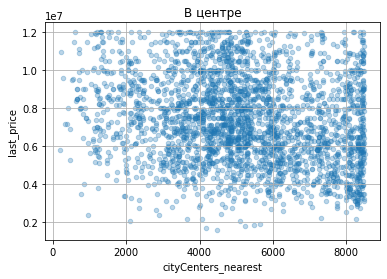

In [73]:
data_spb_center.plot(
    'cityCenters_nearest',
    y='last_price',
    kind='scatter',
    grid=True,
    alpha=0.3,
    title='В центре'
);

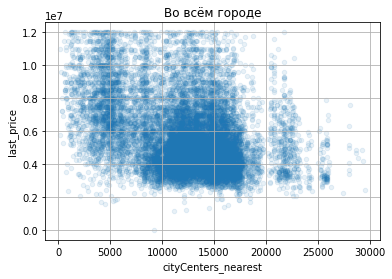

In [74]:
data_spb.plot(
    'cityCenters_nearest',
    y='last_price',
    kind='scatter',
    grid=True,
    alpha=0.1,
    title='Во всём городе'
);

Ожидаемо, квартиры в центре распределились равномерно на графике зависимости цены от удаленности от центра (потому что они все **в центре**). На графике по всему Петербургу видна небольшая обратная зависимость: чем дальше от центра, тем квартиры дешевле. Но опять-таки, большой корреляции не наблюдается.

И последнее — этаж. Посмотрим, как зависит цена от него в центре и в городе в целом.

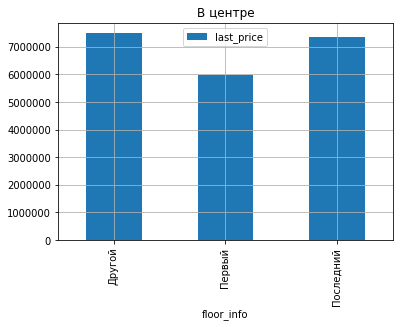

In [75]:
(
    data_spb_center
    .pivot_table(
        index='floor_info',
        values='last_price',
        aggfunc='median'
    )
    .plot(
        kind='bar',
        grid=True,
        title='В центре'
    )
);

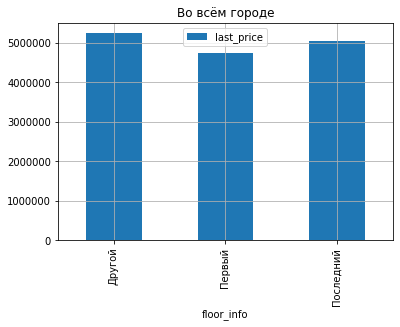

In [76]:
(
    data_spb
    .pivot_table(
        index='floor_info',
        values='last_price',
        aggfunc='median'
    )
    .plot(
        kind='bar',
        grid=True,
        title='Во всём городе'
    )
);

В центре города квартиры на первом этаже ещё дешевле относительно других этажей, чем в городе в целом. Это может быть связано с тем, что Петербург — туристический город, и не все захотят жить на первом этаже проходной улицы, по соседству с ресторанами и магазинами.

### Вывод

В целом все данные получились логичными:
- самые дорогие квартиры — в столице региона Санкт-Петербурге,
- самые дорогие квартиры в городе — в его центре (но разница не такая колоссальная, как между городом и прогородами),
- цена квартир на первом этаже относительно других этажей в центре сравнительно ниже из-за высокой проходимости (и уровня шума),
- квартиры в центре больше и просторнее (они более старые и построены по другим стандартам),
- количество комнат одинаково влияет на цену и в городе в целом, и в его центре.

### Шаг 5. Общий вывод

В процессе предобработки данных мы выявили несколько проблем. Некоторые из них были связаны с человеческим фактором (люди часто пропускают число балконов в форме объявления, если балконов у них нет), некоторые — с техническим (не удалось вычислить удалённость от объектов из-за неполностью заполненного адреса). Некоторые пропуски явно связаны с нехваткой у людей информации (пропуски в информации о высоте потолка или жилой площади квартиры). Пропуски, которые можно было заполнить логически (количество балконов), мы заполнили. Пропуски в данных, которые могли повлиять на распределение (высота потолков, этажность дома), мы не заполняли. Было бы странно присвоить дому, о котором мы ничего не знаем, среднюю этажность (даже если это будет средняя этажность по населённому пункту). Если бы у нас была информация о типе здания (например, хрущёвка), можно было бы заполнить средним для каждого типа высоту потолков (она как правило типовая и отличается несильно). Такой информации у нас нет, поэтому заполнять средним или медианой пропуски рискованно и грозит порчей данных.  
  
В ходе исследования мы пришли к следующим выводам (большинство из них совпадают с интуитивными):
1. Чем ближе квартиры к центру Петербурга, тем они дороже.
2. Чем больше площадь квартиры и число комнат в ней, тем она дороже.
3. Квартиры на первом этаже дешевле остальных.
4. Большинство квартир стоят меньше 7 миллионов рублей.
5. Большинство продаж занимают меньше 230 дней.
6. Продажи дольше 500 дней — слишком долгие.
7. Присутствуют пики на «круглых» значениях длительности размещения: неделя, месяц, полтора, 2 и 3 месяца.
  
Также заметили несколько отличий квартир в центре от остальных:
1. Они больше по площади и потолки в них выше (старая планировка). Преобладают 2-комнатные квартиры (в городе в целом — однушки).
2. Относительно других этажей квартиры на первом ещё дешевле (туристический центр).
3. В целом квартиры в кризис дешевели, в центре — наоборот дорожали.